## Name: Jose Aries E. De Los Santos

Let $n \in \mathbb{N}$. let $P = \lbrace \frac{k}{n} \mid  1 \leq k \leq n \rbrace$. Consider the interpolation nodes $Z = -P \cup \lbrace 0 \rbrace \cup P$ for the function $f(x) = |x|$ on $I = \left[-1,1 \right]$. Let $L_{2n}f$ be the Lagrange interpolating of degree $2n$ of f on Z.



a.) Superimpose the graphs of $f$ and $L_{10} f$ on one plane  and  graphs of $f$ and $L_{50} f$ on another

In [1]:
#@title Import necessary modules and create Lagrange Basis, Lagrange Interpolant and the nodes
import numpy as np
import matplotlib.pyplot as plt

def basis_poly(z, x):
  # Compute the Lagrange basis l_i(z)
  # given the nodes x_i stored in vector x
  n = len(x)
  m = len(z)
  basis = np.ones((n, m))
  for i in range(n):
    for j in range(n):
      if i != j:
        basis[i,:] *= (z-x[j])/(x[i]-x[j])
  return basis

def lagrange_interpolant(z, x, y):
  #Compute the interpolant using Lagrange polynomials
  n = len(x)
  m = len(z)
  P = np.zeros(m)
  basis = basis_poly(z, x)
  for i in range(n):
    P += basis[i,:] * y[i]
  return P

# Define the function f(x) = |x|
def f(x):
    return np.abs(x)

# Define the interpolation nodes Z
n1 = 5 #for L10f
n2 = 25 #for L50f
P1 = np.array([k/n1 for k in range(1, n1+1)])
P2 = np.array([k/n2 for k in range(1, n2+1)])
Z1 = np.concatenate([-P1, [0], P1])
Z2 = np.concatenate([-P2, [0], P2])

Let $n \in \mathbb{N}$. Let $P = \left\{ \frac{k}{n} \mid 1 \leq k \leq n \right\}$. Consider the interpolation nodes $Z = -P \cup \left\{ 0 \right\} \cup P$ for the function $f(x) = |x|$ on $I = \left[-1,1\right]$. Let $L_{2n}f$ be the Lagrange interpolating polynomial of degree $2n$ of $f$ on $Z$.

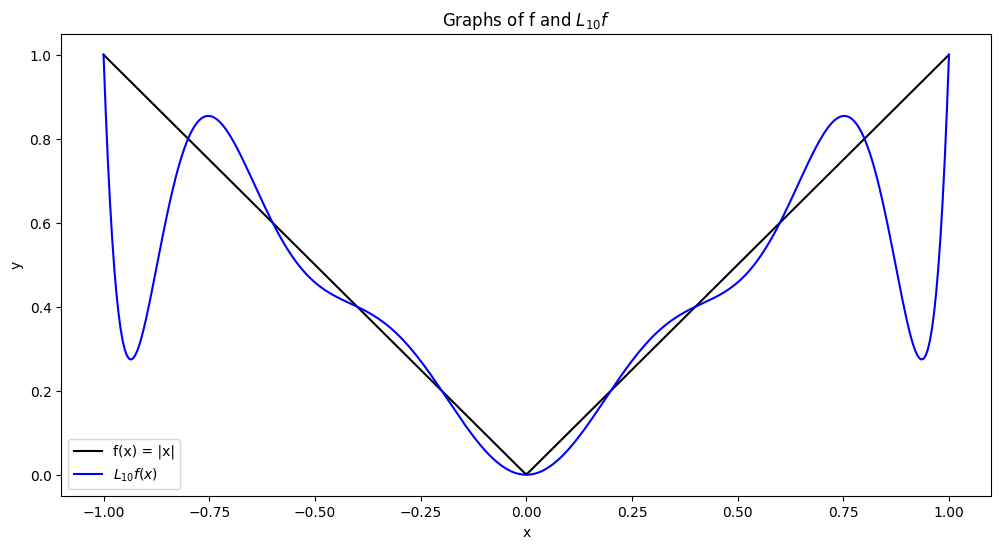

In [2]:
#@title Plot of L_10(f)
# Create a grid of x values for plotting
x = np.linspace(-1, 1, 400)
y_interpolant_L10 = lagrange_interpolant(x, Z1, f(Z1))

# Plot the graphs of f and L
plt.subplots(figsize=(12,6))
plt.plot(x, f(x), label='f(x) = |x|',linestyle="-",color="#000000")
plt.plot(x, y_interpolant_L10, linestyle="-",color="#0000FF", label='$L_{10}f(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphs of f and $L_{10}f$')
plt.legend()
plt.show()

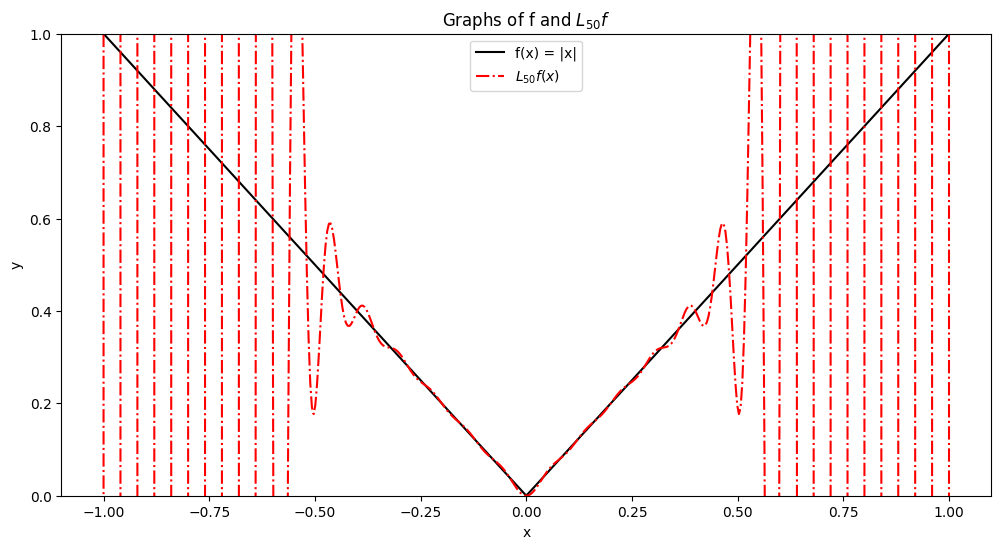

In [3]:
#@title Plot of L_50(f)
# Create a grid of x values for plotting
x = np.linspace(-1, 1, 500)
y_interpolant_L50 = lagrange_interpolant(x, Z2, f(Z2))

# Plot the graphs of f and L
plt.subplots(figsize=(12,6))
plt.plot(x, f(x), label='f(x) = |x|',linestyle="-",color="#000000")
plt.plot(x, y_interpolant_L50, linestyle="-.", color="#FF0000", label='$L_{50}f(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,1)
plt.title('Graphs of f and $L_{50}f$')
plt.legend()
plt.show()

b.) Evaluate $L_{2n}f\left(\frac{\pi}{5}\right)$ for $n = 10$, $n=100$

In [4]:
def lagrange_interpolate(x,n):
    # Define the interpolation nodes
    P = np.array([k/n for k in range(1, n+1)])
    Z = np.concatenate((-P, [0], P))

    #Call the lagrange_interpolant function from 3a.)
    interpolator = lagrange_interpolant(np.array([x]), Z, f(Z))

    return interpolator

value_to_interpolate = np.pi / 5
for n in [10,100]:
  print(f" Value of L_{2*n}f({value_to_interpolate}): {lagrange_interpolate(value_to_interpolate,n)}")

 Value of L_20f(0.6283185307179586): [0.51456457]
 Value of L_200f(0.6283185307179586): [-3.17395295e+13]


In [5]:
#@title (Optional)
from scipy.interpolate import BarycentricInterpolator

# Define the function f(x) = |x|
def f(x):
    return np.abs(x)

def lagrange_interpolate(n):
    # Define the interpolation nodes
    P = np.array([k/n for k in range(1, n+1)])
    Z = np.concatenate((-P, [0], P))

    # Evaluate f at the nodes
    f_Z = f(Z)

    # Use BarycentricInterpolator for better numerical stability
    interpolator = BarycentricInterpolator(Z, f_Z)

    # Evaluate the interpolating polynomial at x = 1/2
    return interpolator(np.pi / 5)

# Compute the interpolation for n = 10, 100, 1000
# results = {n: lagrange_interpolate(n) for n in [10, 100, 1000]}
for n in [10, 100,1000]:
  print(f"At n = {n}, L{2*n}f: we get {lagrange_interpolate(n)}")


At n = 10, L20f: we get 0.5145645715975532
At n = 100, L200f: we get -14189714551200.541
At n = 1000, L2000f: we get -40298323789.76254


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
